In [1]:
import pandas as pd

data = pd.read_csv('data/dataframes/dataframe_final.csv', index_col=0)
label = pd.read_csv('data/dataframes/label_final.csv', index_col=0)

In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['date'] = le.fit_transform(data.index)
data

,date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1963-01-01,0,173,861,3246,1,231,98,1819,905,719,4569
1963-01-01,0,254,245,2251,1,85,1271,0,786,504,858
1963-01-01,0,591,845,3404,1,144,934,380,414,904,6858
1963-01-01,0,372,501,3930,1,51,1582,2922,1156,595,4349
1963-01-01,0,610,791,3439,1,440,1173,2930,347,776,3377
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,3131,346,668,1043,1,70,767,0,642,682,3100
2022-12-26,3131,405,655,2675,0,46,249,1852,821,758,1270
2022-12-26,3131,432,594,1716,1,662,1373,75,655,558,1652
2022-12-26,3131,377,393,3764,1,595,2132,80,621,549,897


In [3]:
data.describe()

,date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,313187.000000,313187.000000,313187.000000,313187.000000,313187.000000,313187.000000,313187.000000,313187.000000,313187.000000,313187.000000,313187.000000
mean,1565.534585,415.898406,516.234039,2519.322999,0.767522,344.311536,1227.081823,783.612337,662.697312,581.615958,3150.557437
std,904.134747,158.213971,199.451839,1526.611535,0.526726,305.524041,520.375149,910.091985,280.963539,238.669055,2043.887049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,783.000000,309.000000,373.000000,1281.000000,0.000000,99.000000,869.000000,0.000000,524.000000,406.000000,1460.000000
50%,1566.000000,417.000000,525.000000,2396.000000,1.000000,212.000000,1310.000000,394.000000,668.000000,602.000000,2930.000000
75%,2349.000000,520.000000,663.000000,3536.000000,1.000000,583.000000,1609.000000,1443.000000,798.000000,780.000000,4571.000000
max,3131.000000,761.000000,932.000000,6001.000000,2.000000,1173.000000,2416.000000,3040.000000,1420.000000,1035.000000,7916.000000


In [4]:
data['mode'] = data['mode'].replace(2, 1)

In [5]:
data.describe()

,date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,313187.000000,313187.000000,313187.000000,313187.000000,313187.000000,313187.000000,313187.000000,313187.000000,313187.000000,313187.000000,313187.000000
mean,1565.534585,415.898406,516.234039,2519.322999,0.718018,344.311536,1227.081823,783.612337,662.697312,581.615958,3150.557437
std,904.134747,158.213971,199.451839,1526.611535,0.449965,305.524041,520.375149,910.091985,280.963539,238.669055,2043.887049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,783.000000,309.000000,373.000000,1281.000000,0.000000,99.000000,869.000000,0.000000,524.000000,406.000000,1460.000000
50%,1566.000000,417.000000,525.000000,2396.000000,1.000000,212.000000,1310.000000,394.000000,668.000000,602.000000,2930.000000
75%,2349.000000,520.000000,663.000000,3536.000000,1.000000,583.000000,1609.000000,1443.000000,798.000000,780.000000,4571.000000
max,3131.000000,761.000000,932.000000,6001.000000,1.000000,1173.000000,2416.000000,3040.000000,1420.000000,1035.000000,7916.000000


In [6]:
label

,0
1963-01-01,1
1963-01-01,2
1963-01-01,3
1963-01-01,4
1963-01-01,5
...,...
2022-12-26,96
2022-12-26,97
2022-12-26,98
2022-12-26,99


In [7]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
data_std = std.fit_transform(data)
data_std = pd.DataFrame(data_std, columns=data.columns, index=data.index)

In [8]:
data_std

,date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1963-01-01,-1.731531,-1.535255,1.728570,0.476007,0.626675,-0.370877,-2.169749,1.137675,0.862400,0.575627,0.693994
1963-01-01,-1.731531,-1.023289,-1.359900,-0.175764,0.626675,-0.848745,0.084397,-0.861027,0.438857,-0.325204,-1.121667
1963-01-01,-1.731531,1.106741,1.648350,0.579505,0.626675,-0.655634,-0.563213,-0.443486,-0.885160,1.350760,1.813920
1963-01-01,-1.731531,-0.277463,-0.076380,0.924059,0.626675,-0.960029,0.682044,2.349643,1.755756,0.056078,0.586356
1963-01-01,-1.731531,1.226832,1.377608,0.602431,0.626675,0.313195,-0.103929,2.358433,-1.123626,0.814451,0.110790
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,1.731454,-0.441797,0.760917,-0.967060,0.626675,-0.897841,-0.884136,-0.861027,-0.073666,0.420600,-0.024736
2022-12-26,1.731454,-0.068884,0.695738,0.101976,-1.595722,-0.976395,-1.879574,1.173936,0.563429,0.739033,-0.920090
2022-12-26,1.731454,0.101771,0.389899,-0.526214,0.626675,1.039817,0.280410,-0.778617,-0.027396,-0.098949,-0.733191
2022-12-26,1.731454,-0.245860,-0.617865,0.815321,0.626675,0.820521,1.738975,-0.773123,-0.148409,-0.136658,-1.102586


In [ ]:
# save the scaler
import pickle

with open('models/StdScaler.pkl', 'wb') as f:
    pickle.dump(std, f)

In [9]:
import numpy as np
from datetime import datetime

def create_sequences(s_year, dataframe, label):
    Xs, ys = [], []
    curday = datetime(s_year, 1, 1)
    dayformat = curday.strftime('%Y-%m-%d')
    now_idx = ''
    for idx in dataframe.index:
        if now_idx == idx:
            continue
        X = dataframe.loc[dayformat].values
        y = label.loc[dayformat].values
        
        s = np.arange(X.shape[0])
        np.random.shuffle(s)
        X = X[s]
        y = y[s]
        
        Xs.append(X)
        ys.append(y)
        if idx != dayformat:
            dayformat = idx
        now_idx = idx
        
    return np.array(Xs, dtype=object), np.array(ys, dtype=object)

In [10]:
X, y = create_sequences(1963, data_std, label)
X.shape, y.shape 

((3132,), (3132,))

In [11]:
def sequenceFlatter(X):
    temp = []
    for x in X:
        for i in x:
            temp.append(i)
    temp = np.array(temp)
    return temp

In [12]:
X = sequenceFlatter(X)
y = sequenceFlatter(y)



In [13]:
X.shape

(313187, 11)

In [14]:
y = y.flatten()
y.shape

(313187,)

In [15]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


[2.70439549 1.69669165 1.30528788 0.94671121 0.92423544 0.76637414
 0.73162945 0.66934868 0.58980551 0.39256475 0.27361382]
[0.24583943 0.15423547 0.11865544 0.08605951 0.08401638 0.06966621
 0.06650779 0.06084624 0.05361548 0.03568557 0.0248725 ]


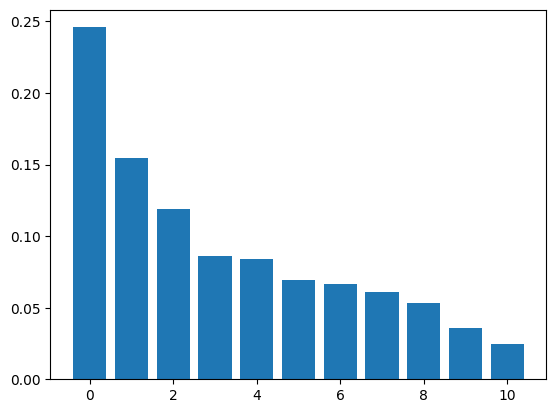

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

x_length = len(X[0])
x = np.arange(x_length)

import matplotlib.pyplot as plt 

plt.bar(x, pca.explained_variance_ratio_)
plt.show()

In [16]:


data2023 = pd.read_csv('data/dataframes/dataframe_2023to2023.csv', index_col=0)
label2023 = pd.read_csv('data/dataframes/label_2023to2023.csv', index_col=0)

In [17]:
data2023['date'] = data2023['date'] + 3132
data2023

,date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
2023-01-01,3132,12,206,574,1,106,333,0,31,173,414
2023-01-01,3132,173,97,666,1,172,524,0,358,463,547
2023-01-01,3132,300,74,652,1,91,527,0,21,430,113
2023-01-01,3132,283,100,47,1,34,350,199,327,476,42
2023-01-01,3132,240,50,49,1,43,514,0,41,466,322
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,3184,187,381,100,1,247,223,0,317,404,416
2023-12-31,3184,262,361,196,0,319,189,0,318,434,30
2023-12-31,3184,92,331,273,1,38,311,22,158,240,393
2023-12-31,3184,344,427,253,0,125,347,142,176,475,167


In [18]:
data2023_std = std.transform(data2023)
data2023_std = pd.DataFrame(data2023_std, columns=data2023.columns, index=data2023.index)

In [19]:
X2023, y2023 = create_sequences(2023, data2023_std, label2023)
X2023 = sequenceFlatter(X2023)
y2023 = sequenceFlatter(y2023)

In [20]:
X_train_pca = pca.fit_transform(X)
X_test_pca = pca.transform(X2023)

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=10)

X_train_lda = lda.fit_transform(X, y)
X_test_lda = lda.transform(X2023)

In [23]:
lda5 = LinearDiscriminantAnalysis(n_components=5)

X_train_lda5 = lda5.fit_transform(X, y)
X_test_lda5 = lda5.transform(X2023)

In [28]:
# GridSearchCV로 KNN의 최적 파라미터 찾기
# 최적 모델 선정 후 models/best_KNN.pkl로 저장
# 최적 모델로 2023년 데이터 예측 후 시각화

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

def getBestKNN(X_train, X_test, title):
    knn = KNeighborsRegressor()
    param_grid = {
        'n_neighbors': [5, 7, 9, 10, 12],
        'weights': ['uniform'],
        'metric': ['minkowski','euclidean','manhattan']
    }

    grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y)
    
    print(title)
    print('Best parameters : ', grid_search.best_params_)
    print('Best score : ', grid_search.best_score_)
    print('Best estimator test score mean : ', cross_val_score(grid_search.best_estimator_, X_test, y2023, cv=3).mean())

    return grid_search.best_estimator_

knnList = [
    (X_train_pca, X_test_pca, 'Standardized_PCA'),
    (X_train_lda, X_test_lda, 'Standardized_LDA'),
    (X_train_lda5, X_test_lda5, 'Standardized_LDA5')
]

for ls in knnList:
    bestKNN = getBestKNN(*ls)
    


# list2023 = [
#     (X2023_pca, 'Standardized_PCA'),
#     (X2023_lda, 'Standardized_LDA'),
#     (X2023_lda5, 'Standardized_LDA5')
    
# ]

# # modelingList의 데이터로 학습한 최적 모델로 list2023의 데이터들로 2023년 데이터 예측
# def predict2023(model, data, label, title):
#     pred = model.predict(data)
    
#     print(title)
#     plt.plot(range(100), label[:100], label='True 2023')
#     plt.plot(range(100), pred[:100], label='Predicted')
#     plt.title(title)
#     plt.legend()
#     plt.show()
    
# for knn, model in zip(knnList, list2023):
#     bestModel = getBestKNN(*knn)
#     predict2023(bestModel, model[0], y2023, model[1])

Standardized_PCA
Best parameters :  {'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'uniform'}
Best score :  -1208.5215997867047
Best estimator test score mean :  0.0900229771695118


KeyboardInterrupt: 

In [37]:
le = LabelEncoder()
yCls = []
for ye in y:
    yCls.append((ye // 10)*10 + 10)
    
yCls = np.array(yCls)
yCls_encoded = le.fit_transform(yCls)

In [38]:
yCls2023 = []
for ye in y2023:
    yCls2023.append((ye // 10)*10 + 10)
    
yCls2023 = np.array(yCls2023)
yCls2023_encoded = le.transform(yCls2023)

c:\Users\PC\CommunityAnalitics\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [39]:
yCls

array([100,  50,  30, ...,  90,  20,  20], dtype=int64)

In [46]:
np.unique(yCls2023_encoded)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, yCls_encoded)
pred = rf.predict(X2023)
pred

array([9, 9, 9, ..., 9, 9, 9], dtype=int64)

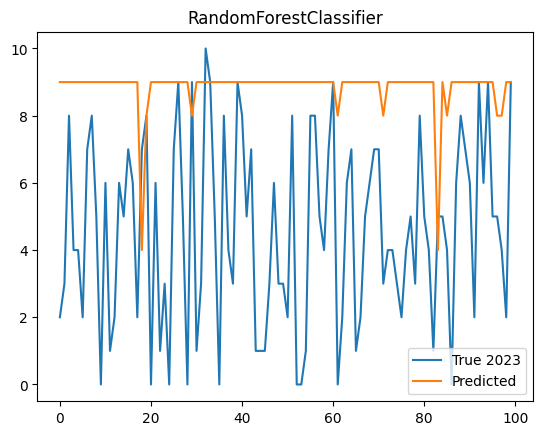

In [43]:
plt.plot(range(100), yCls2023_encoded[:100], label='True 2023')
plt.plot(range(100), pred[:100], label='Predicted')
plt.title('RandomForestClassifier')
plt.legend()
plt.show()

In [49]:

print('정확도 :', accuracy_score(yCls2023_encoded, pred))

정확도 : 0.09886792452830188


In [50]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X, yCls_encoded)
gb_pred = gb_clf.predict(X2023)


In [51]:
gb_accuracy = accuracy_score(yCls2023_encoded, gb_pred)

print('GBM 정확도 : ', gb_accuracy)

GBM 정확도 :  0.10811320754716981


In [69]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

param = {
    'max_depth':[3,5,7],
    'subsample':[0.6, 0.8, 1.0]
}
xgb = XGBClassifier(n_estimators=400, leaning_rate=0.001)
xgb.set_params(early_stopping_rounds=100, eval_metric='merror')
grid_cv = GridSearchCV(xgb, param_grid=param, scoring='accuracy', 
                       cv=3, verbose=1, n_jobs=-1)
grid_cv.fit(X, yCls_encoded, verbose=True, eval_set=[(X2023, yCls2023_encoded)])
print('최적 파라미터 : ', grid_cv.best_params_)
print('최고 예측 정확도 : ', grid_cv.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[0]	validation_0-merror:0.91264


c:\Users\PC\CommunityAnalitics\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:29:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "leaning_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation_0-merror:0.90547
[2]	validation_0-merror:0.90736
[3]	validation_0-merror:0.90981
[4]	validation_0-merror:0.90057
[5]	validation_0-merror:0.89170
[6]	validation_0-merror:0.91113
[7]	validation_0-merror:0.90981
[8]	validation_0-merror:0.91151
[9]	validation_0-merror:0.90660
[10]	validation_0-merror:0.90340
[11]	validation_0-merror:0.88906
[12]	validation_0-merror:0.88472
[13]	validation_0-merror:0.87943
[14]	validation_0-merror:0.87792
[15]	validation_0-merror:0.87906
[16]	validation_0-merror:0.88113
[17]	validation_0-merror:0.88189
[18]	validation_0-merror:0.89453
[19]	validation_0-merror:0.90000
[20]	validation_0-merror:0.90226
[21]	validation_0-merror:0.90264
[22]	validation_0-merror:0.89849
[23]	validation_0-merror:0.89830
[24]	validation_0-merror:0.89321
[25]	validation_0-merror:0.89849
[26]	validation_0-merror:0.90528
[27]	validation_0-merror:0.90057
[28]	validation_0-merror:0.90377
[29]	validation_0-merror:0.90208
[30]	validation_0-merror:0.90264
[31]	validation_0-m

In [70]:
param = {
    'max_depth':[7, 9, 11],
    'subsample':[0.8, 0.85, 0.9]
}
xgb = XGBClassifier(n_estimators=1000, leaning_rate=0.001)
xgb.set_params(early_stopping_rounds=300, eval_metric='merror')
grid_cv = GridSearchCV(xgb, param_grid=param, scoring='accuracy', 
                       cv=3, verbose=1, n_jobs=-1)
grid_cv.fit(X, yCls_encoded, verbose=True, eval_set=[(X2023, yCls2023_encoded)])
print('최적 파라미터 : ', grid_cv.best_params_)
print('최고 예측 정확도 : ', grid_cv.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[0]	validation_0-merror:0.89377


c:\Users\PC\CommunityAnalitics\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:39:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "leaning_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation_0-merror:0.88302
[2]	validation_0-merror:0.89245
[3]	validation_0-merror:0.89226
[4]	validation_0-merror:0.89849
[5]	validation_0-merror:0.89547
[6]	validation_0-merror:0.90283
[7]	validation_0-merror:0.89113
[8]	validation_0-merror:0.89019
[9]	validation_0-merror:0.89811
[10]	validation_0-merror:0.89887
[11]	validation_0-merror:0.89792
[12]	validation_0-merror:0.90377
[13]	validation_0-merror:0.89679
[14]	validation_0-merror:0.90302
[15]	validation_0-merror:0.91396
[16]	validation_0-merror:0.90660
[17]	validation_0-merror:0.90755
[18]	validation_0-merror:0.91189
[19]	validation_0-merror:0.91094
[20]	validation_0-merror:0.91057
[21]	validation_0-merror:0.89170
[22]	validation_0-merror:0.89170
[23]	validation_0-merror:0.89075
[24]	validation_0-merror:0.89453
[25]	validation_0-merror:0.91019
[26]	validation_0-merror:0.88887
[27]	validation_0-merror:0.88698
[28]	validation_0-merror:0.88925
[29]	validation_0-merror:0.89151
[30]	validation_0-merror:0.89000
[31]	validation_0-m

In [74]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=400)

lgbm.fit(X, yCls_encoded, eval_set=[(X2023, yCls2023_encoded)], eval_metric='logloss')
pred = lgbm.predict(X2023)
pred_proba = lgbm.predict_proba(X2023)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2553
[LightGBM] [Info] Number of data points in the train set: 313187, number of used features: 11
[LightGBM] [Info] Start training from score -2.434507
[LightGBM] [Info] Start training from score -2.333773
[LightGBM] [Info] Start training from score -2.337470
[LightGBM] [Info] Start training from score -2.340218
[LightGBM] [Info] Start training from score -2.346270
[LightGBM] [Info] Start training from score -1.935349
[LightGBM] [Info] Start training from score -2.363394
[LightGBM] [Info] Start training from score -2.367849
[LightGBM] [Info] Start training from score -2.375787
[LightGBM] [Info] Start training from score -2.380264
[LightGBM] [Info] Start training from score -4.688316


In [75]:
print(pred_proba)

[[0.03541678 0.0205513  0.05519176 ... 0.1564721  0.10413301 0.00750524]
 [0.02621688 0.0361042  0.05943654 ... 0.12957066 0.31315113 0.00603206]
 [0.03507254 0.04359004 0.09500116 ... 0.16441189 0.09626269 0.00727069]
 ...
 [0.02117073 0.0598326  0.13927979 ... 0.12796541 0.19658293 0.00845569]
 [0.01566199 0.09425534 0.08000993 ... 0.10545316 0.087387   0.00292007]
 [0.01123972 0.01776496 0.08196737 ... 0.14703998 0.09289689 0.22299572]]


In [76]:
accuracy_score(yCls2023_encoded, pred)

0.11037735849056604

In [83]:
lgbm = LGBMClassifier(max_depth=-1, n_estimators=1000, learning_rate=0.001, boosting_type='dart', objective='multiclass', num_iterations=1000)
lgbm.fit(X, yCls_encoded, eval_set=[(X2023, yCls2023_encoded)], eval_metric='error')
pred = lgbm.predict(X2023)
pred_proba = lgbm.predict_proba(X2023)

c:\Users\PC\CommunityAnalitics\.venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2553
[LightGBM] [Info] Number of data points in the train set: 313187, number of used features: 11
[LightGBM] [Info] Start training from score -2.434507
[LightGBM] [Info] Start training from score -2.333773
[LightGBM] [Info] Start training from score -2.337470
[LightGBM] [Info] Start training from score -2.340218
[LightGBM] [Info] Start training from score -2.346270
[LightGBM] [Info] Start training from score -1.935349
[LightGBM] [Info] Start training from score -2.363394
[LightGBM] [Info] Start training from score -2.367849
[LightGBM] [Info] Start training from score -2.375787
[LightGBM] [Info] Start training from score -2.380264
[LightGBM] [Info] Start training from score -4.688316


약 10분 소요

In [85]:
accuracy_score(yCls2023_encoded, pred)

0.08811320754716981

In [90]:
param = {
    'num_leaves': range(10, 200, 30),
    'boosting_type': ['dart'],
}
lgbm.set_params(early_stopping_rounds=300, eval_metric='error', eval_set=[(X2023, yCls2023_encoded)])
grid_cv = GridSearchCV(lgbm, param_grid=param, cv=2, verbose=1, n_jobs=-1, error_score='raise')
grid_cv.fit(X, yCls_encoded)
print('최적의 파라미터 : ', grid_cv.best_params_)
print('최고 정확도 : ', grid_cv.best_score_)

Fitting 2 folds for each of 7 candidates, totalling 14 fits


ValueError: For early stopping, at least one dataset and eval metric is required for evaluation

In [ ]:
filePath = 'models/' + 'lda' + '.pkl'
pickle.dump(lda, open(filePath, 'wb'))

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

def modelingAndVisualizing(X_train, X_test, title):
    knn = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)

    print(title)
    print('학습 정확도 : ', round(train_score, 3))
    print('검증 정확도 : ', round(test_score, 3))
    
    plt.plot(range(100), y_test[:100], label='True')
    plt.plot(range(100), y_pred[:100], label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()
    return knn

Standardized_LDA10
학습 정확도 :  0.882
검증 정확도 :  -0.728


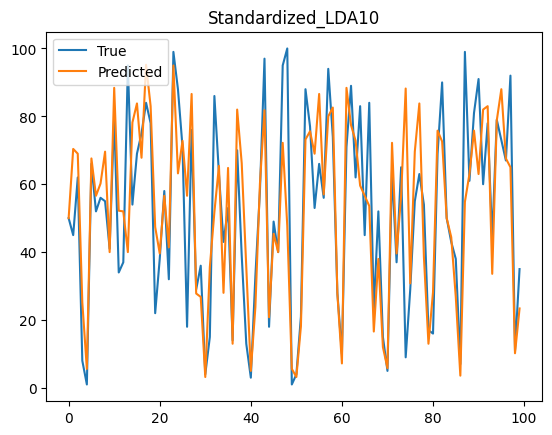

Model saved to models/Standardized_LDA10.pkl


In [126]:
modelingList = [
    # (X_train, X_test, 'Standardized'),
    # (X_train_pca, X_test_pca, 'Standardized_PCA'),
    (X_train_lda, X_test_lda, 'Standardized_LDA10')
]

import pickle
import os

for model in modelingList:
    knn = modelingAndVisualizing(*model)
    # save model to file
    if not os.path.exists('models'):
        os.makedirs('models')
    filePath = 'models/' + model[2] + '.pkl'
    pickle.dump(knn, open(filePath, 'wb'))
    print('Model saved to', filePath)
    

In [24]:
X2023_pca = pca.transform(X2023)


In [25]:
X2023_lda = lda.transform(X2023)

In [26]:
list2023 = [
    (X2023_pca, 'Standardized_PCA'),
    (X2023_lda, 'Standardized_LDA')
]


Score: -0.7563803959998086


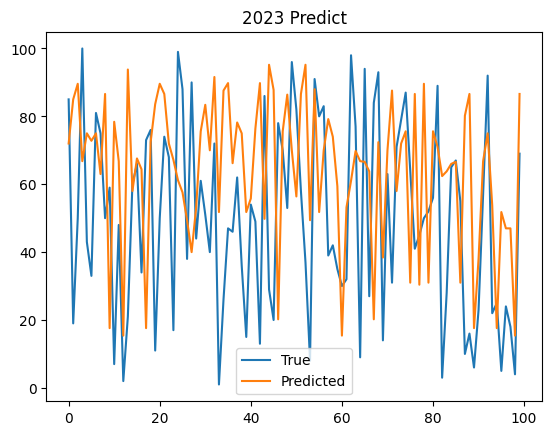

In [134]:
with open('models/Standardized_LDA10.pkl', 'rb') as f:
    standardized_LDA10 = pickle.load(f)
pred2023 = standardized_LDA10.predict(X2023_lda)
print(f"Score: {standardized_LDA10.score(X2023_lda, y2023)}")
# plt
plt.plot(range(100), y2023[:100], label='True')
plt.plot(range(100), pred2023[:100], label='Predicted')
plt.title('2023 Predict')
plt.legend()

plt.show()

In [27]:
def modelingAndVisualizing2023(X_train, y_train, data, label, title):
    knn = KNeighborsRegressor(n_neighbors=10)
    knn.fit(X_train, y_train)
    pred = knn.predict(data)
    
    train_score = knn.score(X_train, y_train)

    print(title)
    print('학습 정확도 : ', round(train_score, 3))
    
    plt.plot(range(100), label[:100], label='True 2023')
    plt.plot(range(100), pred[:100], label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()
    return knn

In [28]:
listFor2023 = [
    (X_train, y_train, X2023, y2023, 'Standardized'),
    (X_train_pca, y_train, X2023_pca, y2023, 'Standardized_PCA'),
    (X_train_lda, y_train, X2023_lda, y2023, 'Standardized_LDA')

]

In [46]:
for model in listFor2023:
    modelingAndVisualizing2023(*model)

KeyboardInterrupt: 

In [ ]:
def modelingAndVisualizing2023(X_train, X_test, title, data, label, n_neighbors, metric='minkowski'):
    knn = KNeighborsRegressor(algorithm='ball_tree', leaf_size=60, n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    test = knn.predict(X_test)
    pred = knn.predict(data)
    
    train_score = knn.score(X_train, y_train)

    print(title)
    print('학습 정확도 : ', round(train_score, 3))
    print("평균 예측 정확도", np.mean(cross_val_score(knn, data, label, cv=3)))
    
    plt.plot(range(100), y_test[:100], label='True Test')
    plt.plot(range(100), test[:100], label='Predicted')
    plt.title("Test " + title)
    plt.legend()
    plt.show()
    
    plt.plot(range(100), label[:100], label='True 2023')
    plt.plot(range(100), pred[:100], label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()
    return knn

Standardized_LDA
학습 정확도 :  0.659
평균 예측 정확도 0.13826119861980182


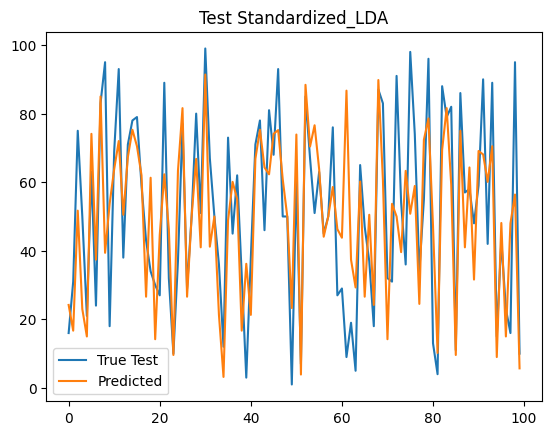

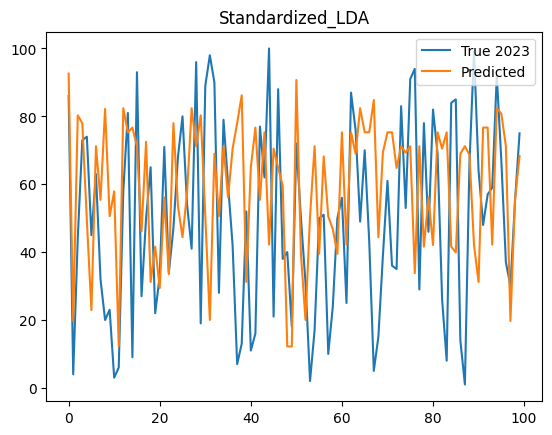

In [73]:
for knn, model in zip(knnList, list2023):
    modelingAndVisualizing2023(*knn, model[0], y2023, 10)

Standardized_LDA
학습 정확도 :  0.582
평균 예측 정확도 0.12622870540681494


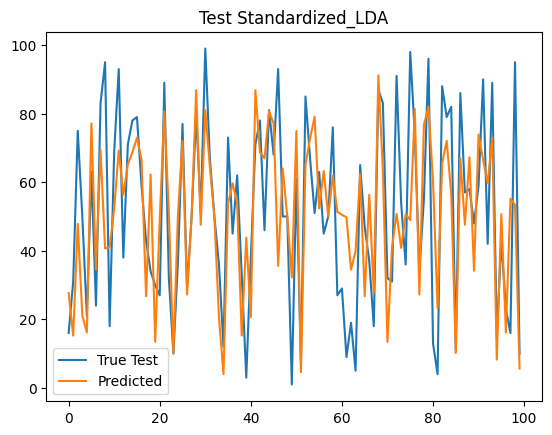

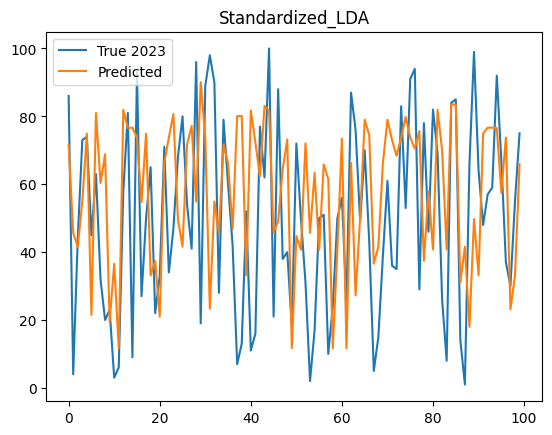

In [74]:
for knn, model in zip(knnList, list2023):
    modelingAndVisualizing2023(*knn, model[0], y2023, 12, 'manhattan')

Standardized_LDA
학습 정확도 :  0.882
평균 예측 정확도 0.18554573776416372


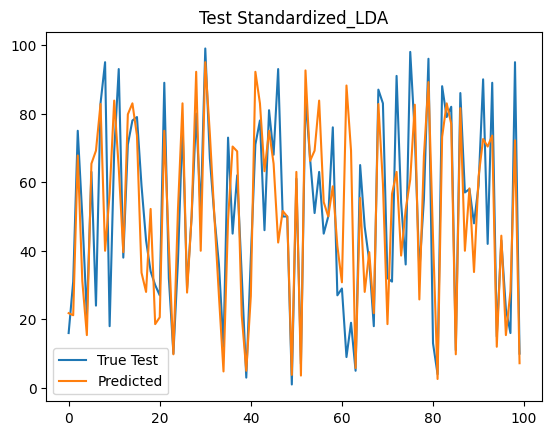

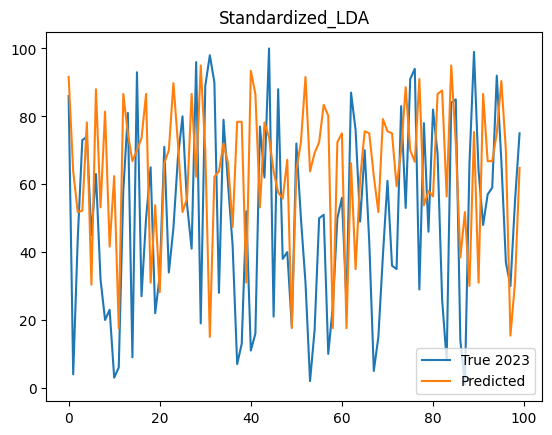

In [72]:
for knn, model in zip(knnList, list2023):
    modelingAndVisualizing2023(*knn, model[0], y2023, 5, 'manhattan')